<a href="https://colab.research.google.com/github/dinasoffa/Numerical-Optimization/blob/main/Adam%26multivariable%26Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
data2 = np.genfromtxt('/content/MultiVarLR - MultiVarLR (2).csv',delimiter=',')

In [3]:
X=data2[:,0:3]
X.shape

(25, 3)

In [4]:
x_0=np.ones((25,1))

In [5]:
x_new=np.hstack((x_0,X))

In [6]:
y=data2[:,-1]

In [7]:
y= y.reshape(y.shape[0],1)
y.shape

(25, 1)

In [8]:
m=len(x_new)
m

25

In [9]:
def batch_multi_ADAM(X,y,epoch,alpha, beta1,beta2, epsilon):
  theta=np.zeros((4,1))
  size=len(X)
  loss=[]
  theta_list=[]
  #m=np.zeros((4,1))
  #v=np.zeros((4,1))
  m,v=0,0
  h_list=[]
  


  for i in range(0,epoch):
      theta_list.append(theta)

      h=X@theta
      h_list.append(h)
      print("h(x) = " ,h)
      error=h-y

      j=(1/(2*size))*(error.T@error)
      loss.append(j[0][0])

      d_theta=(1/size)*(X.T@error)
      print("Gradient Vector :\n",d_theta)
      g_norm=np.linalg.norm(d_theta)
      print("\nGradient Vector Norm :\n",g_norm)


      if i>0 and abs(loss[-1]-loss[-2])<=0.001:
        break

      if g_norm<=0.001:
        break


      m=(beta1*m)+ (1-beta1)*(d_theta)
      v=(beta2*v)+ (1-beta2)*(d_theta.T @d_theta)

      m_avg=(m)/(1-(beta1**(i+1)))
      v_avg=(v)/(1-(beta2**(i+1)))
      theta = theta -(alpha/(sqrt(v_avg)+epsilon ))*(m_avg)
      

 
      print(f"\n******* Epoch {i} *******")
      print("\ncost :\n",j)
      print("\nGradient Vector :\n",d_theta)
      print("\nGradient Vector Norm :\n",g_norm)
      print("\ntheta_new : ",theta)

      

  print("\n******* Training Report *******")
  print(f"\nGradient Descent converged after {i+1} iterations {i} Epochs")
  
  print("\ntheta_0_Opt : \n" ,theta)
  print("\ncost : ",j)
  print()    
  
  
  return theta_list , loss,theta,h_list  




In [10]:
theta_list , loss,theta,h_list= batch_multi_ADAM(x_new,y, 300,0.01,0.05,0.7,1e-08 )

Streaming output truncated to the last 5000 lines.

Gradient Vector :
 [[  -57.05512393]
 [-4602.36420313]
 [-4627.13750923]
 [-4748.28333954]]

Gradient Vector Norm :
 8071.035110033261

theta_new :  [[0.00542317]
 [0.43756848]
 [0.43994646]
 [0.45092214]]
h(x) =  [[100.96279982]
 [121.35033972]
 [119.56713873]
 [130.21896475]
 [ 92.54893869]
 [ 68.23480772]
 [ 97.47469143]
 [ 72.26347212]
 [113.41264427]
 [105.050734  ]
 [ 93.91121702]
 [ 92.59997536]
 [123.52812064]
 [102.68636643]
 [ 97.9232356 ]
 [123.14305261]
 [ 97.79445494]
 [116.97941084]
 [117.76582813]
 [105.37232589]
 [114.30442706]
 [113.84399302]
 [108.97970304]
 [101.79165606]
 [125.76462175]]
Gradient Vector :
 [[  -55.74108321]
 [-4496.30672486]
 [-4520.49646383]
 [-4639.15469325]]

Gradient Vector Norm :
 7885.209304749833

******* Epoch 79 *******

cost :
 [[1592.2181089]]

Gradient Vector :
 [[  -55.74108321]
 [-4496.30672486]
 [-4520.49646383]
 [-4639.15469325]]

Gradient Vector Norm :
 7885.209304749833

theta_new

In [11]:
y_pred=h_list[-1]

In [12]:
r2_score(y,y_pred)

0.9803377077769961

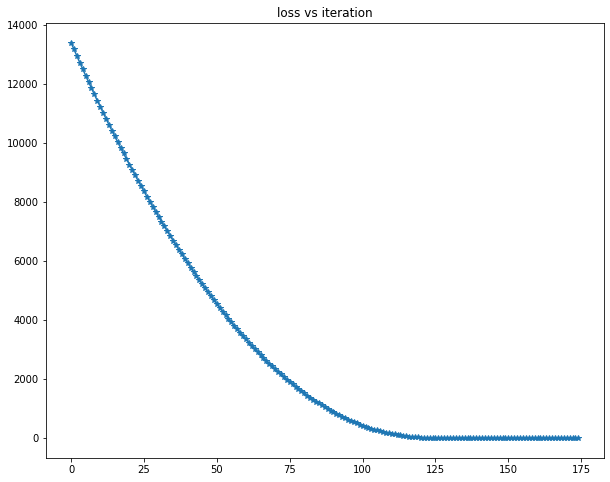

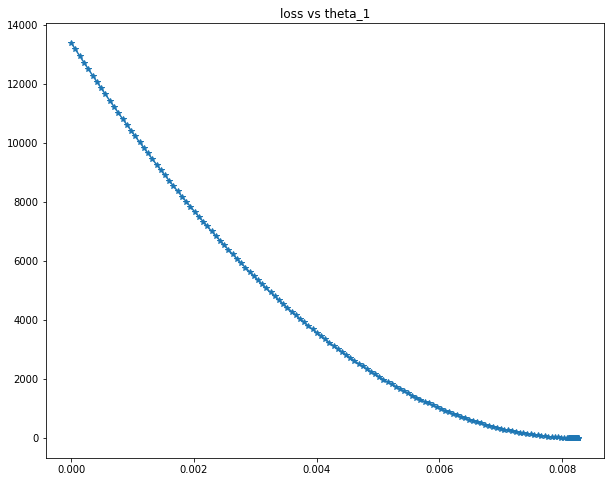

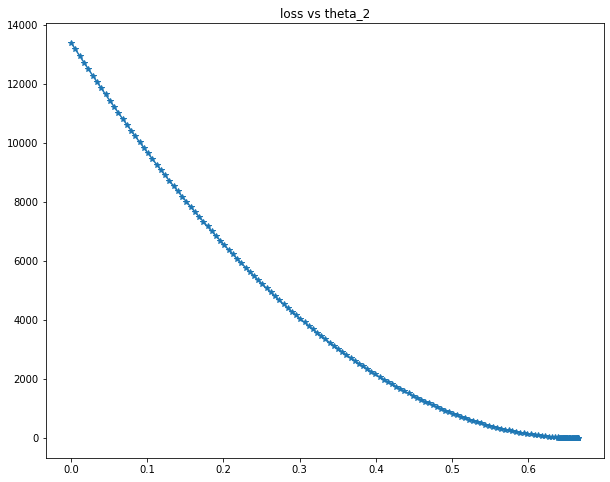

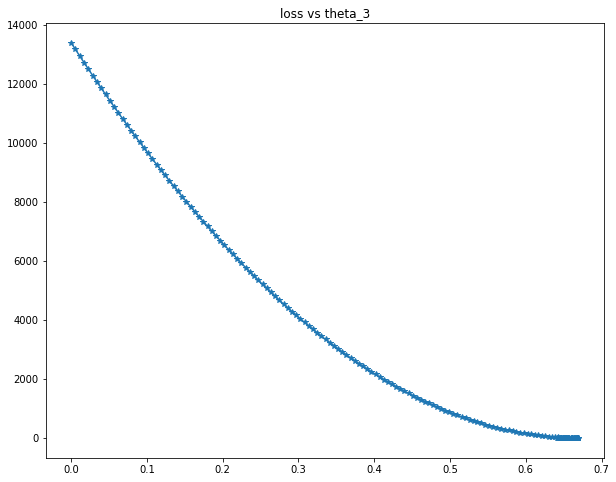

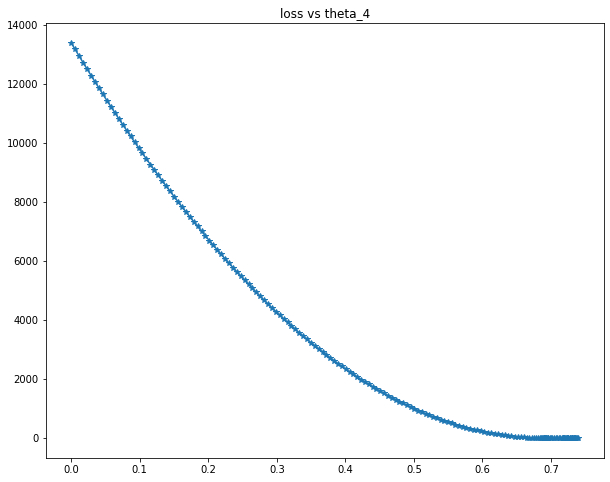

In [13]:
plt.figure(figsize=(10,8) )
plt.title("loss vs iteration")
plt.plot(loss, marker='*')
plt.show()

plt.figure(figsize=(10,8))
plt.title("loss vs theta_1")
plt.plot([i[0] for i in theta_list], loss, marker='*')
plt.show()

plt.figure(figsize=(10,8))
plt.title("loss vs theta_2")
plt.plot([i[1] for i in theta_list], loss, marker='*')
plt.show()

plt.figure(figsize=(10,8))
plt.title("loss vs theta_3")
plt.plot([i[2] for i in theta_list], loss, marker='*')
plt.show()

plt.figure(figsize=(10,8))
plt.title("loss vs theta_4")
plt.plot([i[3] for i in theta_list], loss, marker='*')
plt.show()



## Repeat using BFGS optimizer instead of Adam.


In [14]:
def BFGS(x_new,y,epoch):
  theta=np.array([[0.0001],
                    [0.0001],
                    [0.0001],
                    [0.0001]])

  theta_1 = np.zeros((4,1))
  h_x_1=x_new @theta_1
  error_1=h_x_1-y
  size =  2*len(x_new)
  j_1 = 1/size * error_1.T @ error_1
  d_theta_1 = (x_new.T @ error_1 ) / len(x_new)


  H=[]
  B=np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1]])
  I=np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1]])
  
  
  B_INV=B.T
  d_theta_list=[]
  d_theta_list.append(d_theta_1)
  theta_list=[]
  theta_list.append(theta_1)
  loss=[]
  loss.append(j_1[0][0])
  

  for i in range(0, epoch):
    print(f"\n******* Iteration {i} *******")
    theta_list.append(theta)
    delta_x=theta_list[-1]-theta_list[-2]
    h_x = x_new @ theta
    H.append(h_x)
    print("h(x) = " ,h_x)

    err=(h_x - y)
    m_2 =  2*len(x_new)
    j = 1/m_2 * err.T @ err
    loss.append(j[0][0])
    print("\nError Vector:\n" , err)
    print("\nj = " ,j)
    
    d_theta = (x_new.T @ err ) / len(x_new)
    d_theta_list.append(d_theta)
    print("Gradient Vector :\n",d_theta)
    G_norm = np.linalg.norm(d_theta)
    print("\nGradient Vector Norm :\n",G_norm)
    if G_norm <= 0.099 :
        break
    if i>2 and abs(loss[-1] -loss[-2]) <= 0.0001:
        break

    delta_y=d_theta_list[-1]-d_theta_list[-2]
    
    B_INV=(I-((delta_x@delta_y.T)/(delta_y.T@ delta_x)))@B_INV@(I-((delta_y@delta_x.T)/(delta_y.T@delta_x)))+((delta_x@delta_x.T)/(delta_y.T@delta_x))
    theta=theta-B_INV@d_theta
    

    
    
    
    
    print("\ntheta_new : ",theta)
    

    i+=1
    
  # ****** Training Report ********
  print("\n******* Training Report *******")
  print(f"\nGradient Descent converged after {i+1} iterations")
  print("\ntheta_0_Opt : \n" ,theta)
  print("\nError Vector: ",err)
  print("\ncost : ",j)
  print("\nh(x) = y_predict: \n" ,h_x)
  
  print()
  return H,theta_list,loss

In [15]:
h,theta_list,loss=BFGS(x_new,y,300)


******* Iteration 0 *******
h(x) =  [[0.0229]
 [0.0275]
 [0.0271]
 [0.0295]
 [0.021 ]
 [0.0155]
 [0.0221]
 [0.0164]
 [0.0257]
 [0.0238]
 [0.0213]
 [0.021 ]
 [0.028 ]
 [0.0233]
 [0.0222]
 [0.0279]
 [0.0222]
 [0.0265]
 [0.0267]
 [0.0239]
 [0.0259]
 [0.0258]
 [0.0247]
 [0.0231]
 [0.0285]]

Error Vector:
 [[-151.9771]
 [-184.9725]
 [-179.9729]
 [-195.9705]
 [-141.979 ]
 [-100.9845]
 [-148.9779]
 [-114.9836]
 [-174.9743]
 [-163.9762]
 [-140.9787]
 [-140.979 ]
 [-183.972 ]
 [-151.9767]
 [-147.9778]
 [-191.9721]
 [-146.9778]
 [-182.9735]
 [-176.9733]
 [-158.9761]
 [-176.9741]
 [-174.9742]
 [-174.9753]
 [-148.9769]
 [-191.9715]]

j =  [[13401.99508431]]
Gradient Vector :
 [[  -162.0159  ]
 [-13073.854992]
 [-13145.244284]
 [-13465.078708]]

Gradient Vector Norm :
 22914.138111706616

theta_new :  [[ 0.56036482]
 [-3.4585185 ]
 [-4.06799334]
 [ 9.32117503]]

******* Iteration 1 *******
h(x) =  [[121.73717447]
 [187.80400835]
 [161.47057722]
 [201.99674466]
 [132.08320611]
 [142.79581744]
 [178

In [16]:
h_x=h[-1]

In [17]:
r2_score(y, h_x)

0.9889571309966998

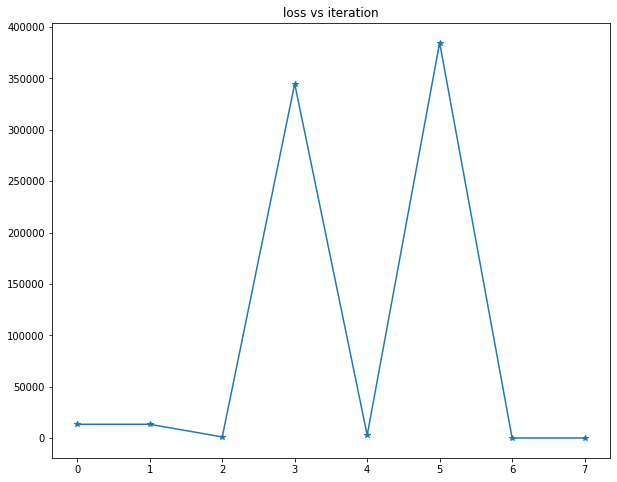

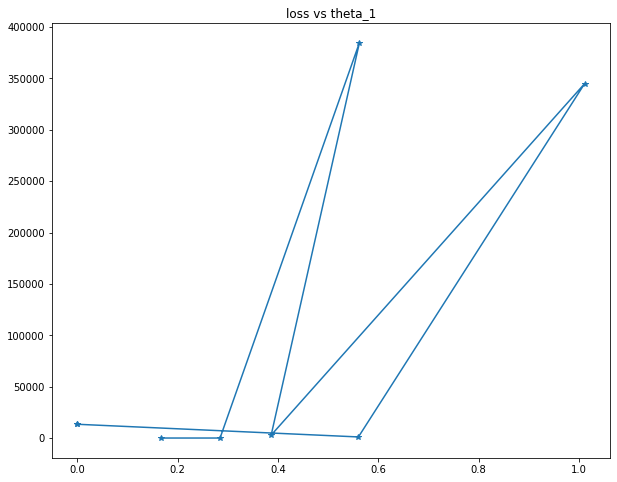

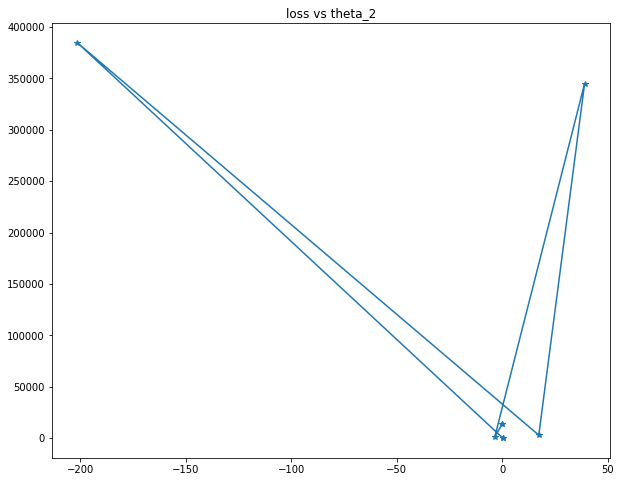

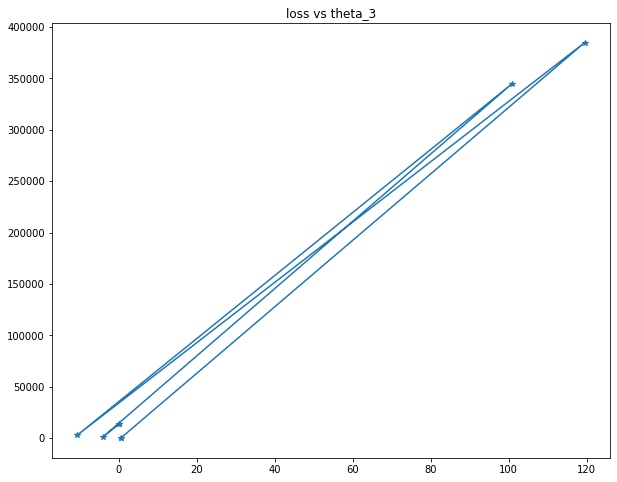

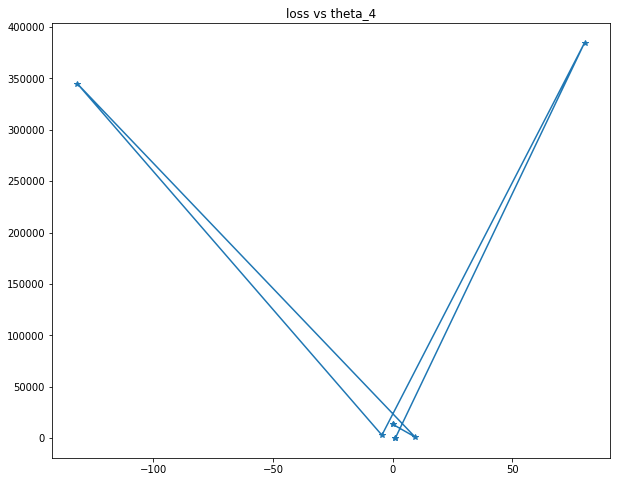

In [18]:
plt.figure(figsize=(10,8) )
plt.title("loss vs iteration")
plt.plot(loss, marker='*')
plt.show()

plt.figure(figsize=(10,8))
plt.title("loss vs theta_1")
plt.plot([i[0] for i in theta_list], loss, marker='*')
plt.show()

plt.figure(figsize=(10,8))
plt.title("loss vs theta_2")
plt.plot([i[1] for i in theta_list], loss, marker='*')
plt.show()

plt.figure(figsize=(10,8))
plt.title("loss vs theta_3")
plt.plot([i[2] for i in theta_list], loss, marker='*')
plt.show()

plt.figure(figsize=(10,8))
plt.title("loss vs theta_4")
plt.plot([i[3] for i in theta_list], loss, marker='*')
plt.show()


# the conclusion

# by using the second derivative the number of iteration decresed "from 175 iteration to only 7 iteration " that because when use second derivative we use curve like curve of loss function"convex function " instead of line "that we do in the first derivative " so it become easy to reach to the minumum in only few steps  